# Bike Sharing Assignment 
US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Objectives - 
- Understand the demand of shared bikes during the pandemic 
- Variables that are significant in prediction the demand for shared bikes
- How well those variables explain the demand 

In [1]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 


In [2]:
#Reading the dataframe as bikes and checking the structure
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking for missing values and datatypes
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Description of numerical columns 
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Analysis - Relationships with the target variable

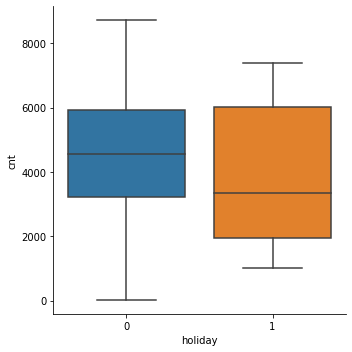

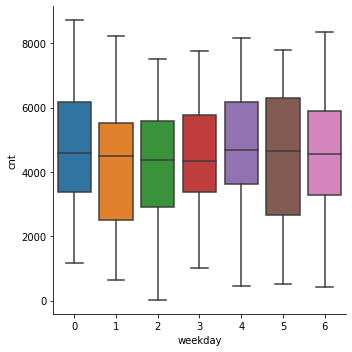

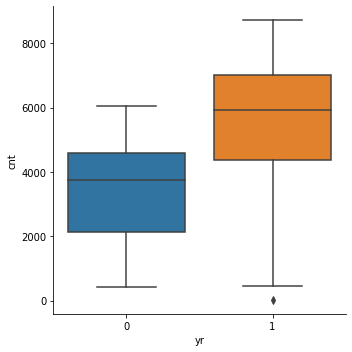

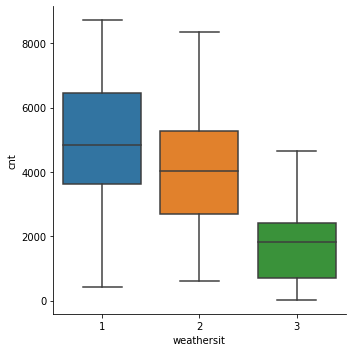

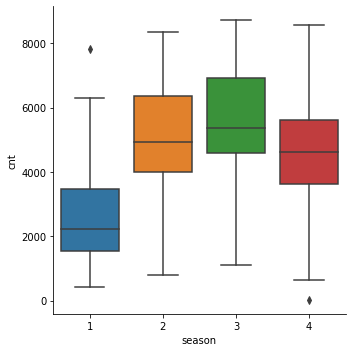

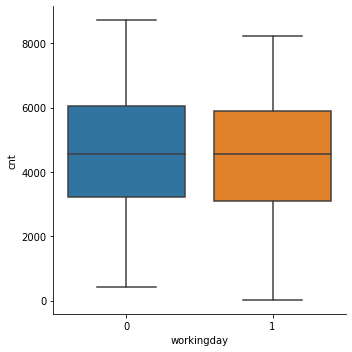

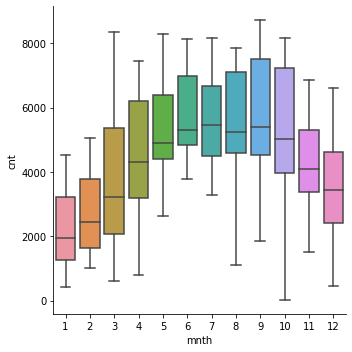

In [5]:
# Plotting every categorical variable against 'cnt'(target) to check spread and trends
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered','instant','dteday']
cat_vars = list(set(bikes.columns) - set(num_vars))
for i in cat_vars:
    sns.catplot(x=i,y='cnt',data=bikes,kind='box')

- Year - The year 2019 denoted by 1 tends to show much higher number of total customers than in the year 2018
- Season Variables divided into Summer(2), Spring(1) and Winter(4), Summer season seems to show point towards a positive trend whereas Spring seems to be related with a decline in customer numbers. 
- Winter season doesn’t seem to have much of an effect on customer trends
- Weather variables divided into Snowy and Cloudy. Snowy weather seems to be a major factor in decline of customers whereas Cloudy weather also shows a minor dip in customer average over the period
- Looking into the Month variable, we observe a rise in customer count from May through to October which shows preference for warmer temperatures for customers
- Public holidays don’t seem to point towards a rise in customers


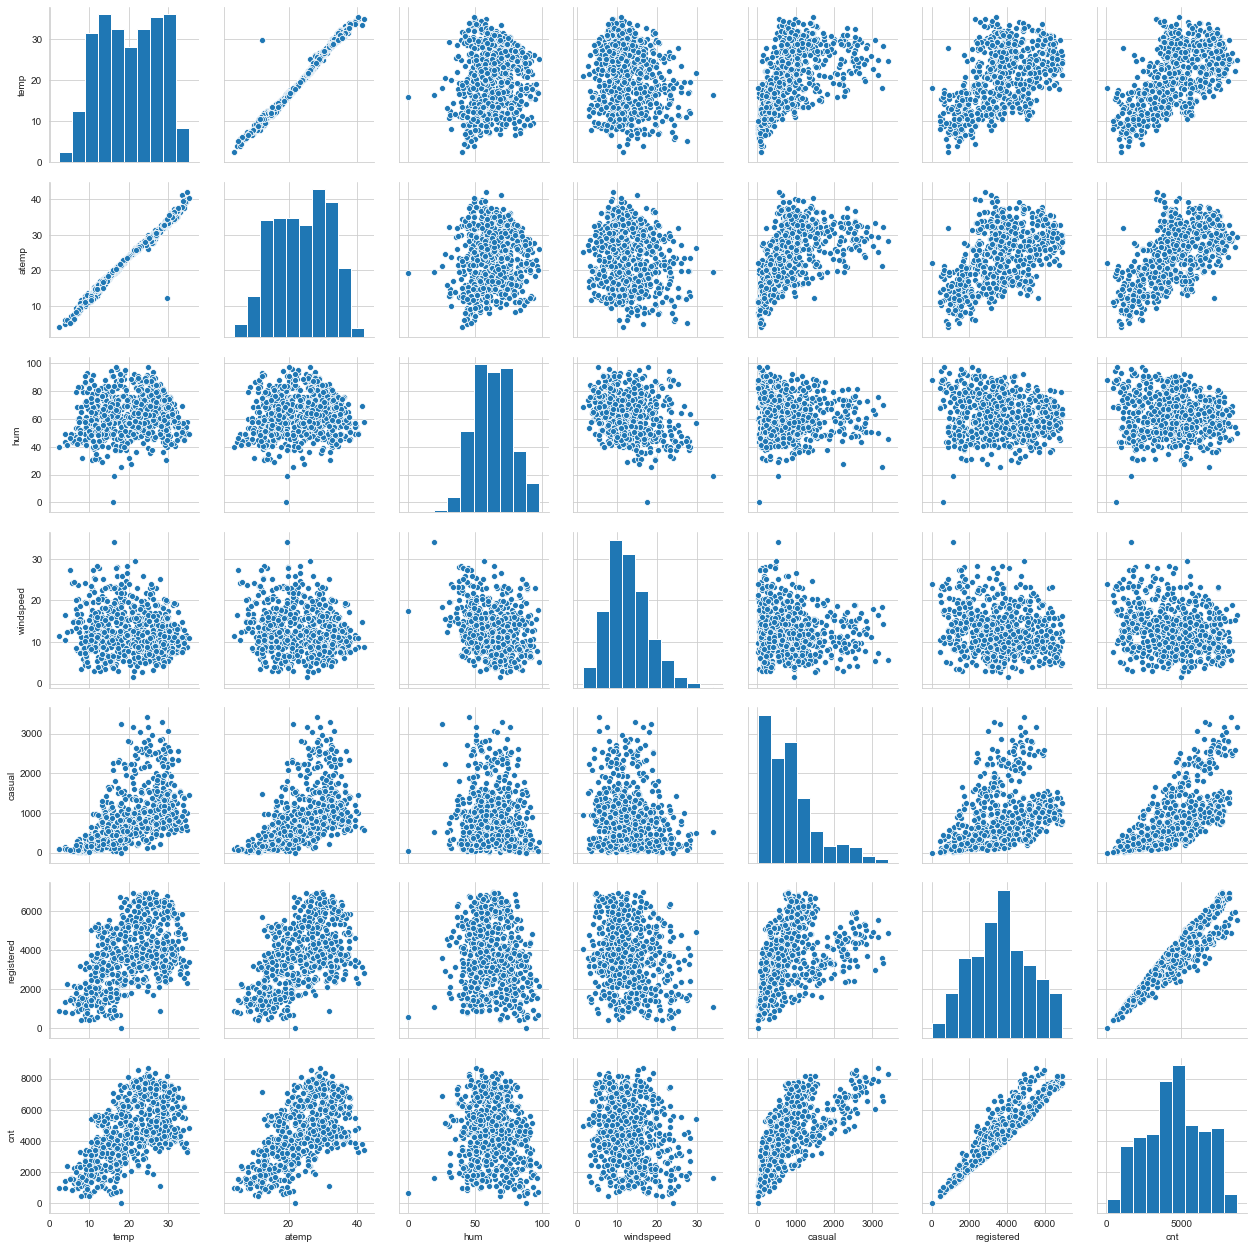

In [6]:
# Plotting Numerical columns to check relationship with 'cnt'
sns.set_style('whitegrid')
num_vars = ['temp', 'atemp', 'hum', 'windspeed','casual','registered','cnt']
sns.pairplot(bikes[num_vars])

- `temp` and `atemp` have very high correlation
- `casual` and `registered` depict heteroscedasticity 

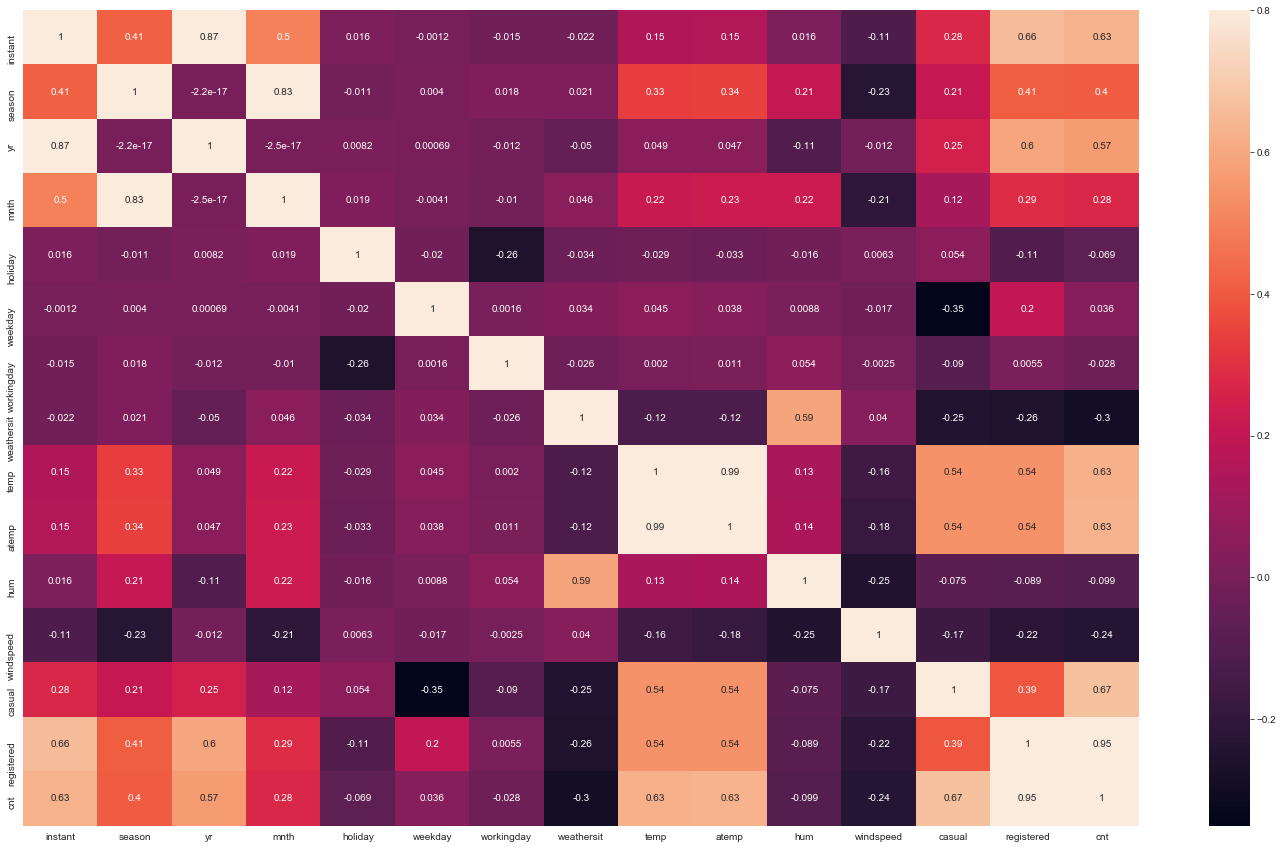

In [7]:
# Generating a heatmap to better visualise correlations betweeen variables

plt.figure(figsize=[25,15])
sns.set_style('whitegrid')
sns.heatmap(bikes.corr(),annot=True,vmax=0.8)

- Dropping `atemp` for having high correlation with temp variable
- Dropping `casual` and `registered` for being heteroscedastic

In [8]:
bikes.drop(['casual','registered','dteday','atemp','instant'],axis=1,inplace=True)

## Preprocessing - Categorical Variables

In [9]:
# Replacing weekday numbers to weekday Names before dummy variable generation
bikes['weekday'].replace([1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],inplace=True)

# Generating Dummy Variables for 'weekday'
weekday = pd.get_dummies(bikes['weekday'],drop_first=True)

# Concatenating variables generated with the original dataframe 'bikes'
bikes = pd.concat([bikes,weekday],axis=1)

# Dropping the column 'weekday'
bikes.drop('weekday',axis=1,inplace=True)

# Checking the updated dataframe 
bikes.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,1,0,1,0,1,2,14.110847,80.5833,10.749882,985,0,1,0,0,0,0
1,1,0,1,0,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1
3,1,0,1,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0
4,1,0,1,0,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0


In [10]:
# Replacing season numbers to Season Names before dummy variable generation
bikes['season'].replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

# Generating Dummy Variables for 'season'
seasons = pd.get_dummies(bikes['season'],drop_first=True)

# Concatenating variables generated with the original dataframe 'bikes'
bikes = pd.concat([bikes,seasons],axis=1)

# Dropping the column 'season'
bikes.drop('season',axis=1,inplace=True)

# Checking the updated dataframe 
bikes.head()

,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,spring,summer,winter
0,0,1,0,1,2,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0
1,0,1,0,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,1,0,0
3,0,1,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,1,0,0
4,0,1,0,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0


In [11]:
# Replacing weather numbers to Weather Names before dummy variable generation
bikes['weathersit'].replace([1,2,3,4],['Clear','Cloudy','Snowy','Heavy Rain'],inplace=True)

# Generating Dummy Variables for 'weathersit'
weather = pd.get_dummies(bikes['weathersit'],drop_first=True)

# Concatenating variables generated with the original dataframe 'bikes'
bikes = pd.concat([bikes,weather],axis=1)

# Dropping the column 'weathersit'
bikes.drop('weathersit',axis=1,inplace=True)

# Checking the updated dataframe 
bikes.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,spring,summer,winter,Cloudy,Snowy
0,0,1,0,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,1,0
1,0,1,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,1,0
2,0,1,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,1,0,0,0,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,1,0,0,0,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0


In [12]:
# Replacing working numbers to Working Names before dummy variable generation
bikes['workingday'].replace([0,1],['Not Working','Working'],inplace=True)

# Generating Dummy Variables for 'workingday'
working = pd.get_dummies(bikes['workingday'],drop_first=True)

# Concatenating variables generated with the original dataframe 'bikes'
bikes = pd.concat([bikes,working],axis=1)

# Dropping the column 'weathersit'
bikes.drop('workingday',axis=1,inplace=True)

# Checking the updated dataframe 
bikes.head()

,yr,mnth,holiday,temp,hum,windspeed,cnt,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,spring,summer,winter,Cloudy,Snowy,Working
0,0,1,0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,1,0,1
1,0,1,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,1,0,1
2,0,1,0,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,1,0,0,0,0,1
3,0,1,0,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,1


In [13]:
# Replacing working numbers to Working Names before dummy variable generation
bikes['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

# Generating Dummy Variables for 'mnth'
month = pd.get_dummies(bikes['mnth'],drop_first=True)

# Concatenating variables generated with the original dataframe 'bikes'
bikes = pd.concat([bikes,month],axis=1)

# Dropping the column 'weathersit'
bikes.drop('mnth',axis=1,inplace=True)

# Checking the updated dataframe 
bikes.head()

,yr,holiday,temp,hum,windspeed,cnt,Friday,Monday,Saturday,Thursday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,8.050924,43.7273,16.636703,1349,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building - Linear Regression

In [14]:
# Importing required libraries to split the dataframe

from sklearn.model_selection import train_test_split

In [15]:
# Splitting into X and y before creating training and testing sets 

y = bikes.pop('cnt')
X = bikes

In [16]:
# Generating training and testing sets with 30% test size

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

In [17]:
# Checking the shapes of generated testing and training sets 

print('Training Set',X_train.shape,y_train.shape)
print('Test Set',X_test.shape,y_test.shape)

Training Set (511, 28) (511,)
Test Set (219, 28) (219,)


## Feature Scaling 

In [18]:
# Scaling the numerical variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
# Scaling the numerical variables in the training set 
num_vars = ['temp', 'hum', 'windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,temp,hum,windspeed,Friday,Monday,Saturday,Thursday,Tuesday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,0.509887,0.575354,0.300794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Importing RFE for initial feature selection and Linear Model from sklearn 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
# Fitting the model on the tarining set and running RFE to select top 10 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [22]:
# Printing out RFE output
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Friday', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 8),
 ('Thursday', True, 1),
 ('Tuesday', False, 3),
 ('Wednesday', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Cloudy', True, 1),
 ('Snowy', True, 1),
 ('Working', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 9),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1)]

In [23]:
# Selecting chosen top ranked variables 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Friday', 'Thursday',
       'Wednesday', 'spring', 'summer', 'winter', 'Cloudy', 'Snowy', 'Working',
       'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [24]:
# Updating the training set to only contain selected columns 
X_train_rfe = X_train[col]

In [25]:
# adding constant column to X_train before fitting statsmodels Linear model
X_train_rfe = sm.add_constant(X_train_rfe)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
# Fitting a linear model to the updating training set
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [27]:
# Printing out summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.99e-187
Time:                        11:38:02   Log-Likelihood:                -4112.5
No. Observations:                 511   AIC:                             8267.
Df Residuals:                     490   BIC:                             8356.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3005.8502    320.902      9.367      0.000    2375.336    3636.364
yr          2008.9331     69.693     28.825      0.000    1871.998    2145.868
holiday     -997.9465    238.207     -4.189      0.000   -1465.979    -529.914
temp        3980.8333    330.355     12.050      0.000    3331.746    4629.921
hum        -1318.0191    326.925     -4.032      0.000   -1960.367    -675.672
windspeed  -1605.5229    223.123     -7.196      0.000   -2043.920   -1167.126
Friday       220.8799    109.772      2.012      0.045       5.198     436.562
Thursday     260.8153    110.563      2.359      0.019      43.580     478.051
Wednesday    157.3051    112.732      1.395      0.164     -64.192     378.802
spring      -455.6118    190.395     -2.393      0.017    -829.703     -81.520
summer       336.4187    133.247      2.525      0.012      74.613     598.225
winter       904.5572    155.267      5.826      0.000     599.486    1209.628
Cloudy      -502.1284     90.700     -5.536      0.000    -680.338    -323.919
Snowy      -2202.1980    229.158     -9.610      0.000   -2652.452   -1751.944
Working     -289.0914     91.945     -3.144      0.002    -469.747    -108.436
Dec         -419.3398    158.623     -2.644      0.008    -731.005    -107.674
Feb         -322.3968    187.275     -1.722      0.086    -690.357      45.563
Jan         -550.7311    185.640     -2.967      0.003    -915.479    -185.983
Jul         -443.4039    157.990     -2.807      0.005    -753.825    -132.983
Nov         -403.4492    164.112     -2.458      0.014    -725.899     -80.999
Sep          630.8560    145.847      4.325      0.000     344.293     917.419
==============================================================================
Omnibus:                       76.187   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.223
Skew:                          -0.765   Prob(JB):                     1.34e-41
Kurtosis:                       5.550   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Checking VIF to detect Multicollinearity within independent variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.13
9,spring,5.70
3,temp,4.75
11,winter,3.85
10,summer,2.82
17,Jan,2.37
4,hum,1.94
16,Feb,1.86
19,Nov,1.81
15,Dec,1.66


In [29]:
# Removing Columns with P-value > 0.05 and Removing Spring due to high VIF value (Multicollinear)
X_train_rfe_2 = X_train_rfe.drop(['Wednesday','Feb','spring'],axis=1)

In [30]:
# Training a new model
lm_new = sm.OLS(y_train,X_train_rfe_2).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.75e-187
Time:                        11:38:02   Log-Likelihood:                -4119.6
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     493   BIC:                             8351.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2347.0985    253.703      9.251      0.000    1848.625    2845.572
yr          1995.2837     70.285     28.388      0.000    1857.188    2133.379
holiday     -958.7861    230.978     -4.151      0.000   -1412.609    -504.963
temp        4779.9902    234.157     20.414      0.000    4319.922    5240.059
hum        -1451.1669    328.259     -4.421      0.000   -2096.126    -806.208
windspeed  -1694.9139    223.351     -7.589      0.000   -2133.750   -1256.078
Friday       164.1583    105.643      1.554      0.121     -43.408     371.725
Thursday     205.1061    106.654      1.923      0.055      -4.446     414.658
summer       638.6634     96.434      6.623      0.000     449.190     828.137
winter      1233.8792    115.891     10.647      0.000    1006.178    1461.580
Cloudy      -470.2796     91.220     -5.155      0.000    -649.508    -291.051
Snowy      -2124.6055    230.657     -9.211      0.000   -2577.798   -1671.413
Working     -238.1709     86.701     -2.747      0.006    -408.520     -67.822
Dec         -287.1694    151.773     -1.892      0.059    -585.372      11.033
Jan         -409.4532    157.615     -2.598      0.010    -719.133     -99.773
Jul         -376.0284    156.569     -2.402      0.017    -683.653     -68.404
Nov         -282.5573    160.960     -1.755      0.080    -598.809      33.694
Sep          772.0673    140.131      5.510      0.000     496.740    1047.395
==============================================================================
Omnibus:                       63.189   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.723
Skew:                          -0.701   Prob(JB):                     6.78e-29
Kurtosis:                       5.031   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Checking VIF to detect Multicollinearity within independent variables 
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.90
3,temp,2.33
9,winter,2.10
4,hum,1.91
16,Nov,1.71
14,Jan,1.67
10,Cloudy,1.57
13,Dec,1.49
8,summer,1.45
15,Jul,1.45


In [32]:
# Removing Columns with P-value > 0.05
X_train_rfe_3 = X_train_rfe_2.drop(['Nov','Dec','Thursday','Friday'],axis=1)

In [33]:
# Training a new model
lm_new_2 = sm.OLS(y_train,X_train_rfe_3).fit()
lm_new_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.09e-190
Time:                        11:38:02   Log-Likelihood:                -4124.5
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     497   BIC:                             8336.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2247.2848    249.503      9.007      0.000    1757.074    2737.495
yr          1994.3055     70.634     28.234      0.000    1855.527    2133.084
holiday     -975.6042    230.357     -4.235      0.000   -1428.197    -523.012
temp        4961.5410    221.362     22.414      0.000    4526.620    5396.462
hum        -1508.0760    328.183     -4.595      0.000   -2152.873    -863.279
windspeed  -1685.4801    223.847     -7.530      0.000   -2125.283   -1245.678
summer       662.9503     95.949      6.909      0.000     474.435     851.466
winter      1102.3432     99.497     11.079      0.000     906.857    1297.830
Cloudy      -460.5232     91.493     -5.033      0.000    -640.284    -280.763
Snowy      -2064.6845    229.366     -9.002      0.000   -2515.331   -1614.038
Working     -159.6132     80.035     -1.994      0.047    -316.862      -2.365
Jan         -329.7779    152.524     -2.162      0.031    -629.448     -30.107
Jul         -411.4330    156.585     -2.628      0.009    -719.082    -103.784
Sep          814.0621    139.748      5.825      0.000     539.492    1088.633
==============================================================================
Omnibus:                       58.652   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.870
Skew:                          -0.675   Prob(JB):                     1.88e-25
Kurtosis:                       4.878   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Characteristics of the chosen model (lm_new_2)
- All the variables have a P-Value lower than 0.05 proving their significance
- A very low F-statistic shows that the model is a good fit
- The closeness is R2 score and R2-adjusted score shows that having these many variables actually improve the model

In [34]:
# Checking VIF to detect Multicollinearity within independent variables 
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.56
3,temp,2.06
4,hum,1.89
8,Cloudy,1.57
11,Jan,1.55
7,winter,1.53
12,Jul,1.43
6,summer,1.42
9,Snowy,1.24
5,windspeed,1.19


- Low VIF values show no evidence of Multicollinearity within the independent variables 

## Finding the most significant predictors

In [35]:
# Finding the top 3 features contributing significantly towards explaining 
# the demand of the shared bikes
lm_new_2.params

const        2247.284802
yr           1994.305525
holiday      -975.604229
temp         4961.540976
hum         -1508.075999
windspeed   -1685.480100
summer        662.950290
winter       1102.343215
Cloudy       -460.523208
Snowy       -2064.684524
Working      -159.613192
Jan          -329.777856
Jul          -411.433036
Sep           814.062114
dtype: float64

### Explaining how the most significant variables explain the demand in shared bikes:
`temp`,`year`,`snowy` end up explaining 72% of the demand of shared bikes 

In [36]:
significant_var = X_train_rfe_3[['temp','yr','Snowy','const']]
lm_sig = sm.OLS(y_train,significant_var).fit()
lm_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     436.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.94e-140
Time:                        11:38:03   Log-Likelihood:                -4270.7
No. Observations:                 511   AIC:                             8549.
Df Residuals:                     507   BIC:                             8566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        5028.9740    204.484     24.594      0.000    4627.234    5430.714
yr          2027.0556     92.315     21.958      0.000    1845.689    2208.423
Snowy      -2011.0351    271.994     -7.394      0.000   -2545.410   -1476.661
const        816.4588    124.285      6.569      0.000     572.281    1060.637
==============================================================================
Omnibus:                       10.434   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.550
Skew:                          -0.320   Prob(JB):                      0.00512
Kurtosis:                       3.295   Cond. No.                         7.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

In [37]:
# Starting residual analysis 
y_train_pred = lm_new_2.predict(X_train_rfe_3)

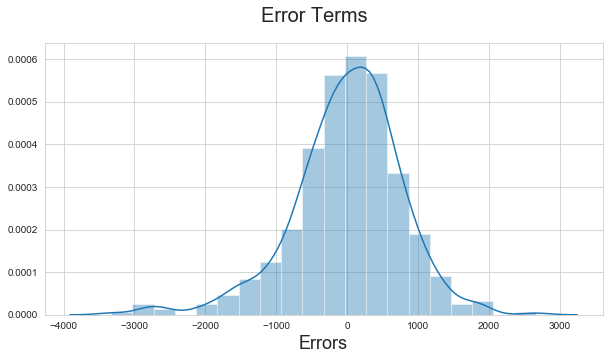

In [38]:
# Plotting the residuals 
fig = plt.figure(figsize=[10,5])
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18);  

- The error terms are centrally distributed
- The average of error terms is zero

Text(0, 0.5, 'Cnt')

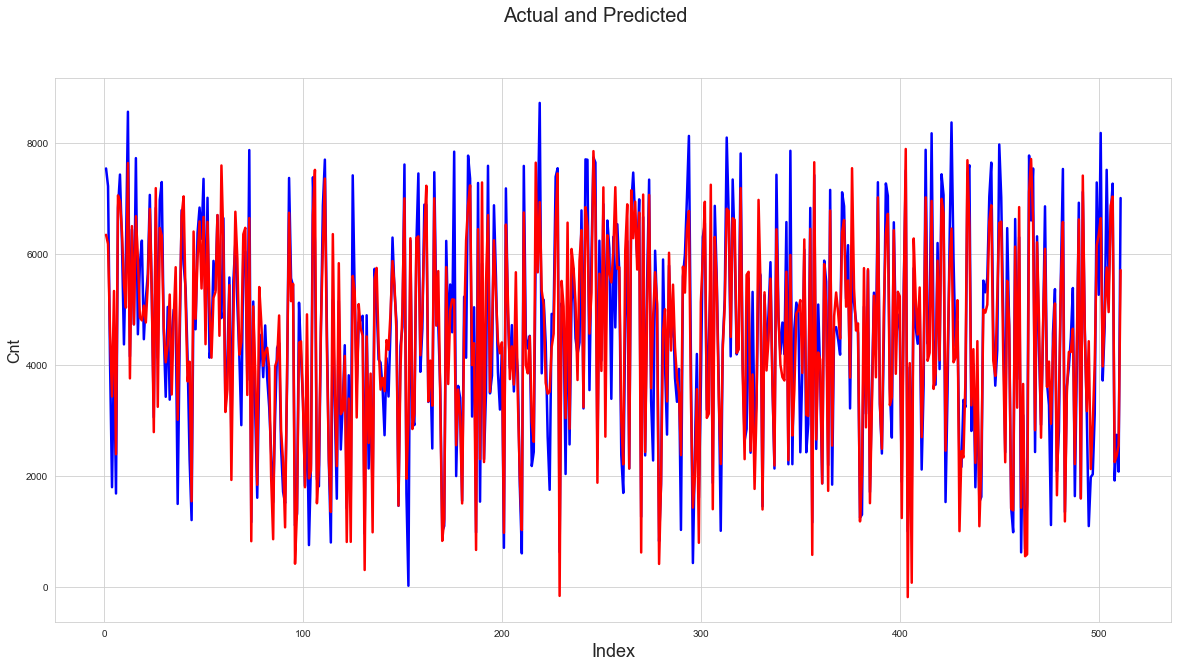

In [39]:
#Actual vs Predicted on the training set
c = [i for i in range(1,512,1)]
fig = plt.figure(figsize=[20,10])
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)                               # Y-label

In [40]:
# Transforming the test set
num_vars = ['temp', 'hum', 'windspeed']

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,temp,hum,windspeed,Friday,Monday,Saturday,Thursday,Tuesday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0.831783,0.657364,0.084219,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,0.901354,0.610133,0.153728,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,0.881625,0.437098,0.339570,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
#Making predictions on test set, first adding constant
X_test_new = sm.add_constant(X_test)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
# Sorting the columns 
X_test_new = X_test_new[X_train_rfe_3.columns]

In [43]:
# Making Predictions on new test set using the model lm_new_2 (latest model) 
y_test_pred = lm_new_2.predict(X_test_new)

Text(0, 0.5, 'Cnt')

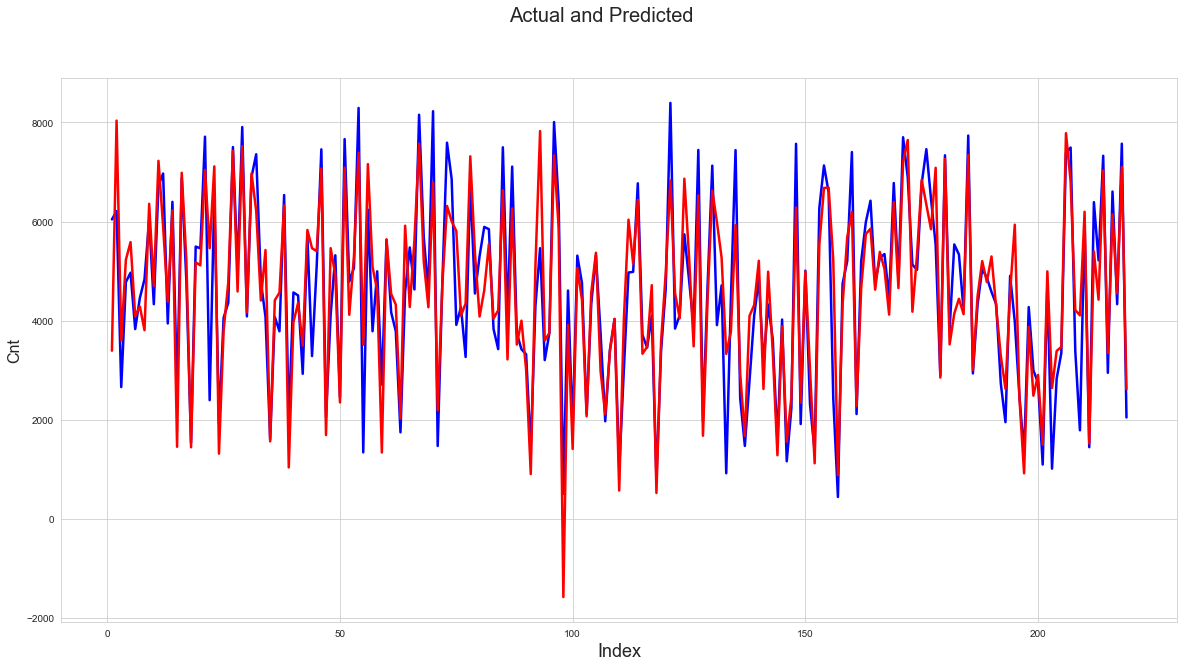

In [44]:
# Checking Actual vs Predicted Values
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=[20,10])
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)                               # Y-label

## R2 Score (On the test set)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8039336778234607

# Final Takeaways 
- R2 Score on the training set - 84.2 %
- R2 Score on the test set - 80.3 %
- Linear model assumptions - Homodescascity, Multicollinearity & Error terms distribution were verified 
- The most significant predictor variables are Temp(temperature), Year and Snowy (weather)
- 72% of the demand is explained by these three most significant variables